In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast

1. Data-related roles available in the market
2. Industries that need data-related role
3. Minimum company size to embrace data-related role
4. Contract type
5. Top skills required for each role type
6. Role and skills required mismatch

Roles considered:
- Data Analyst
- Data Scientist
- Data Engineer
- Business Intelligence

In [59]:
df_jobs = pd.read_csv('jobs.csv')
df_jobs.head()

,URL,Title,Company,Industry,Size,Posted at,Location,Job Type,Experience Required,Responsibilities,Requirements,Skills Required,Raw Details
0,https://www.techinasia.com/jobs/5ae5dd38-934c-...,Data Analyst,Cicil,"Lending, loans, and credit",51 – 200,Date created: 9 Nov 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,['Senior Digital Performance Marketing Special...,['Senior Digital Performance Marketing Special...,"['Python', 'SQL', 'R']","<div class=""jsx-3475296548""><ul><li>Analyze da..."
1,https://www.techinasia.com/jobs/4796d0b2-d056-...,Data Analyst,Aruna,Retail (food),51 – 200,Date created: 8 Nov 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,"['Data Intelligence (Senior)SIRCLOTangerang, I...","['Data Intelligence (Senior)SIRCLOTangerang, I...","['Analytics', 'Data Science', 'Data Analysis']","<div class=""jsx-3475296548""><p><strong>Job Des..."
2,https://www.techinasia.com/jobs/5fa7c12f-6906-...,Data Analyst (Mid),Bobobox Indonesia,Hotels & Accomodation,51 – 200,Date created: 5 Nov 2021,"Bandung, Java, Indonesia",Full-time,1 to 4 years,['Processing confidential data and information...,['Minimum 2 year work experience as a data ana...,"['Data Analysis', 'Big Data', 'Databases']","<div class=""jsx-3475296548""><p><em>Founded in ..."
3,https://www.techinasia.com/jobs/f57cc1f4-0697-...,Data Analyst,Diary Bunda,Health Care,11 – 50,Date created: 3 Nov 2021,"Jakarta, Indonesia",Freelance,1 to 4 years,['Enable effective decision making by retrievi...,['Enable effective decision making by retrievi...,"['MySQL', 'Python', 'Business Analysis', 'Data...","<div class=""jsx-3475296548""><p><strong>Positio..."
4,https://www.techinasia.com/jobs/2f12e8ef-60d8-...,Data Analyst (Mid),Bobobox Indonesia,Hotels & Accomodation,51 – 200,Date created: 31 Oct 2021,"Bandung, Java, Indonesia",Full-time,1 to 4 years,['Processing confidential data and information...,['Minimum 2 year work experience as a data ana...,"['Data Analysis', 'Microsoft Excel', 'Python',...","<div class=""jsx-3475296548""><p><strong>Respons..."


In [87]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   URL                  160 non-null    object
 1   Title                160 non-null    object
 2   Company              160 non-null    object
 3   Industry             160 non-null    object
 4   Size                 160 non-null    object
 5   Posted at            160 non-null    object
 6   Location             160 non-null    object
 7   Job Type             160 non-null    object
 8   Experience Required  160 non-null    object
 9   Responsibilities     160 non-null    object
 10  Requirements         160 non-null    object
 11  Skills Required      160 non-null    object
 12  Raw Details          160 non-null    object
dtypes: object(13)
memory usage: 16.4+ KB


In [60]:
df_jobs['Title'].values

array(['Data Analyst', 'Data Analyst', 'Data Analyst (Mid)',
       'Data Analyst', 'Data Analyst (Mid)', 'Data Analyst ',
       'Data Analyst', 'Data Analyst', 'Data Analyst',
       'Data Analyst (P2P)', 'Data Analyst',
       'Data Analyst (Placement : Batu Kajang)', 'Data Analyst Intern',
       'Data Analyst & Operations Associate',
       'Data Analyst Lead (Remote)',
       'Data Analyst Assistant Manager (SQL/ Statistic/ Data Science Back Ground)',
       'Data Analyst (Remote)', 'Associate Data Analyst',
       'People Data Analyst Intern', 'Business Analyst',
       'Business Analyst', "eCommerce Analyst (Mama's Choice)",
       'OPEX Analyst', 'HR Analyst', 'Digital Analyst',
       'Business Analyst (Finance Function)', 'System Analyst',
       'Process Analyst Specialist', 'Business Analyst - ORAMI ',
       'Business Analyst', 'Business Analyst', 'Marketing Analyst',
       'Marketing Research Analyst ', 'Lead Administrator Analyst',
       'Business Performance Analyst'

In [179]:
# df_jobs_da = df_jobs[df_jobs['Title'].str.match(
#     '\w*(Data Analyst|Data Engineer|Business Intelligence\
#     |Data Intelligence|Data Analytic|Data Scientist)\w*'
# )]

df_jobs_da = df_jobs[df_jobs['Title'].str.match(
    '^.*(Data Analyst|Data Engineer|Business Intelligence|Data Intelligence|Data Analytic|Data Scientist|Data).*'
)]

df_jobs_da['Job Type_old'] = df_jobs_da.loc[:, 'Job Type'].copy()
df_jobs_da.loc[:, 'Job Type'] = df_jobs_da.loc[:, ['Title', 'Job Type']].copy().apply(
    lambda x: 'Internship' if 'Intern' in x[0] else x[1], axis=1)

/var/folders/0s/2ngs3p4j0dn7m5nk3w1gcrs40000gn/T/ipykernel_12754/2877275083.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_da['Job Type_old'] = df_jobs_da.loc[:, 'Job Type'].copy()
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [195]:
def identify_role(title):
    if re.match('^.*Engineer.*', title):
        return 'Data Engineer'
    elif re.match('^.*(Business Intelligence|BI).*', title):
        return 'Business Intelligence'
    elif re.match('^.*Scientist.*', title):
        return 'Data Scientist'
    return 'Data Analyst'
    

df_jobs_da['Role'] = df_jobs_da.loc[:, 'Title'].copy().apply(identify_role)

/var/folders/0s/2ngs3p4j0dn7m5nk3w1gcrs40000gn/T/ipykernel_12754/2426482862.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_da['Role'] = df_jobs_da.loc[:, 'Title'].copy().apply(identify_role)


In [196]:
df_jobs_da['Role'].value_counts()

Data Engineer            25
Data Analyst             22
Business Intelligence    10
Data Scientist            9
Name: Role, dtype: int64

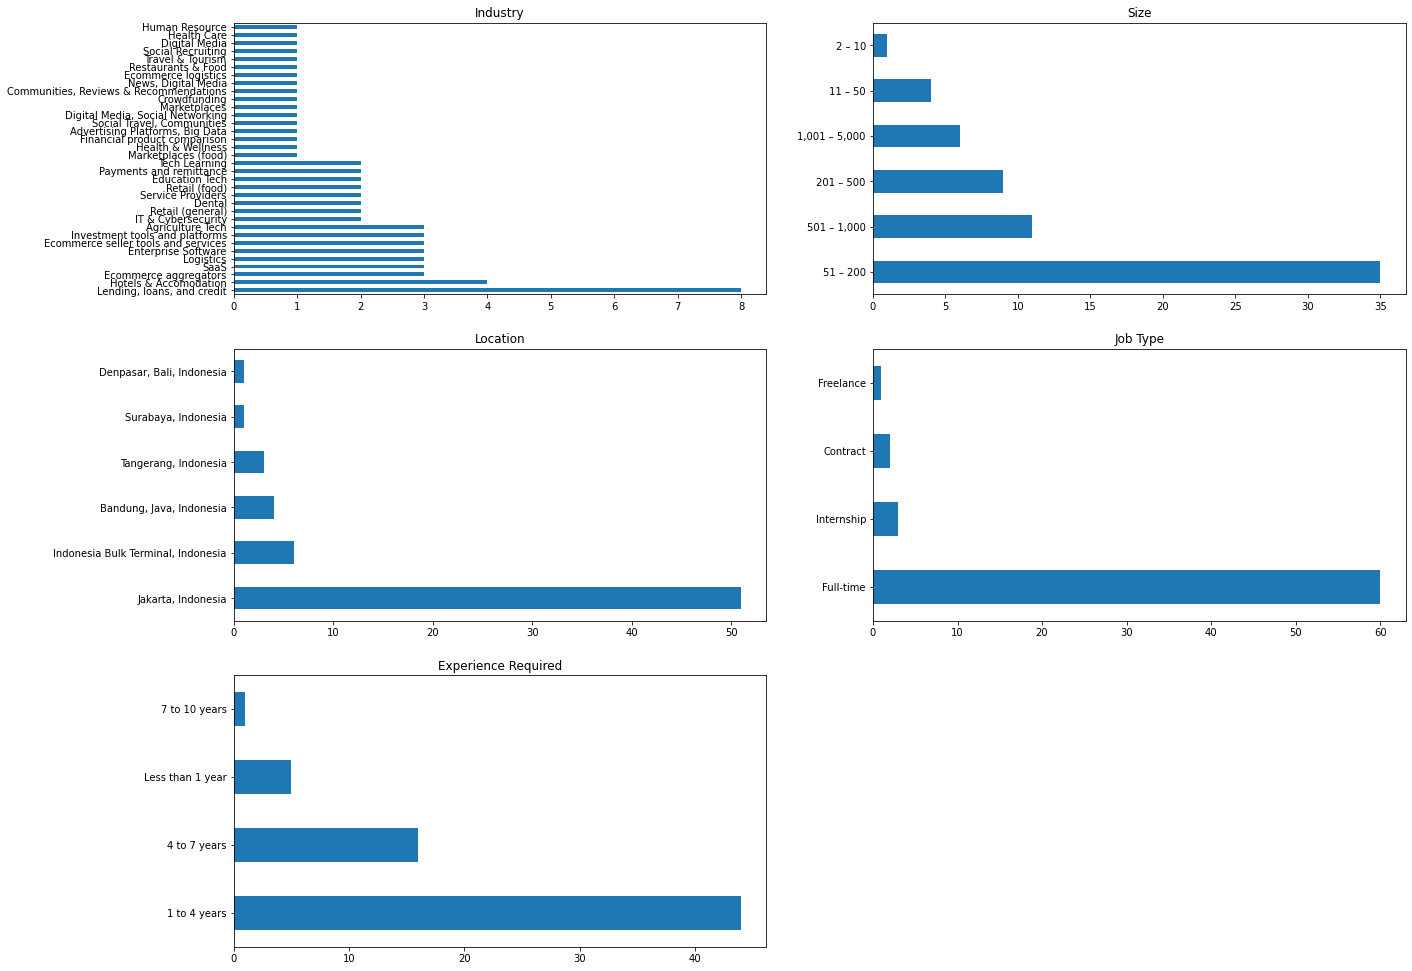

In [197]:
ctg_cols = ['Industry', 'Size', 'Location',
            'Job Type', 'Experience Required']

fig, ax = plt.subplots(3,2, figsize=(21,17))
ax.flatten()[-1].remove()

for ix, col in enumerate(ctg_cols):
    curr_ax = ax.flatten()[ix]
    df_jobs_da[col].value_counts().plot(kind='barh', ax=curr_ax)
    curr_ax.set_title(col)
    
plt.show()

In [198]:
print('Total data-related job posts: {}'.format(df_jobs_da.shape[0]))

Total data-related job posts: 66


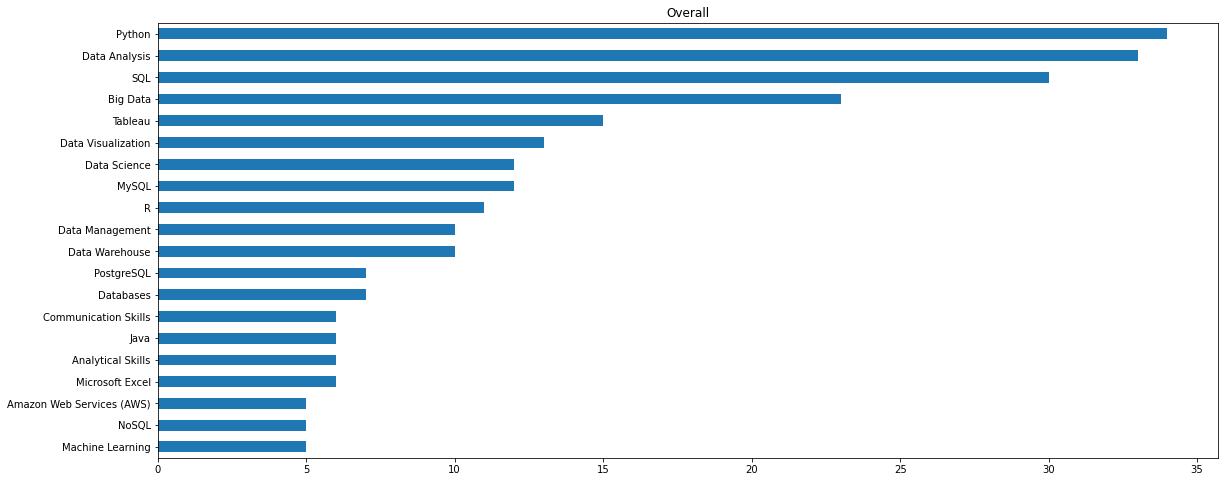

In [203]:
skill_required_lists = df_jobs_da['Skills Required'].apply(lambda x: ast.literal_eval(x)).values.tolist()
skill_required_all = np.array([skill for skill_list in skill_required_lists for skill in skill_list])
skill_count = np.unique(skill_required_all, return_counts=True)

plt.figure(figsize=(19,8))
pd.Series(index=skill_count[0], data=skill_count[1]).sort_values()[-20:].plot(kind='barh')
plt.title('Overall')
plt.show()

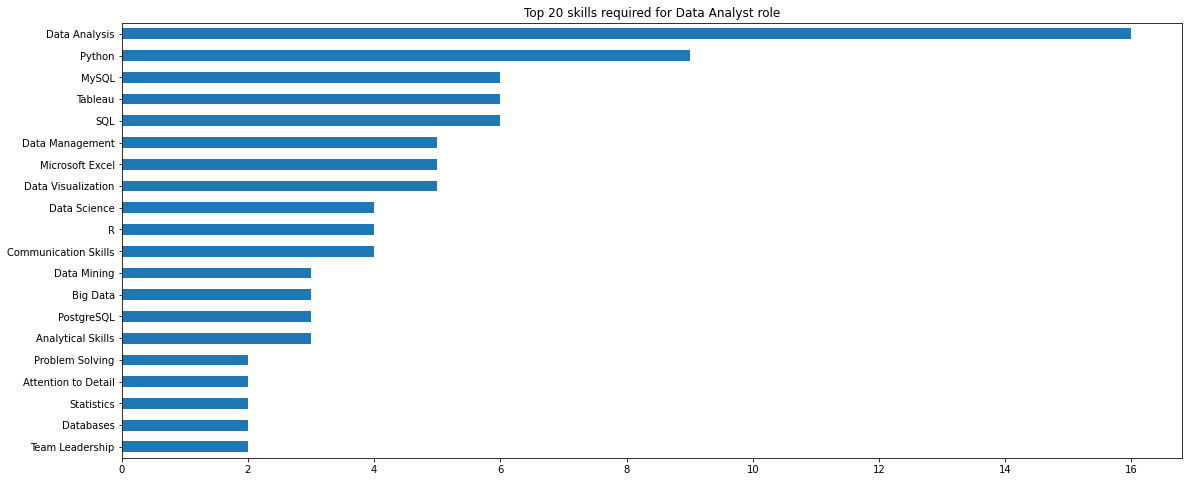

In [209]:
def show_top_required_skills(top_n=20, role='Data Analyst'):
    skill_required_lists = df_jobs_da[df_jobs_da['Role'] == role]['Skills Required'].apply(
        lambda x: ast.literal_eval(x)).values.tolist()
    skill_required_all = np.array([skill for skill_list in skill_required_lists for skill in skill_list])
    skill_count = np.unique(skill_required_all, return_counts=True)

    plt.figure(figsize=(19,8))
    pd.Series(index=skill_count[0], data=skill_count[1]).sort_values()[-top_n:].plot(kind='barh')
    plt.title('Top {} skills required for {} role'.format(top_n, role))
    plt.show()
    
show_top_required_skills()

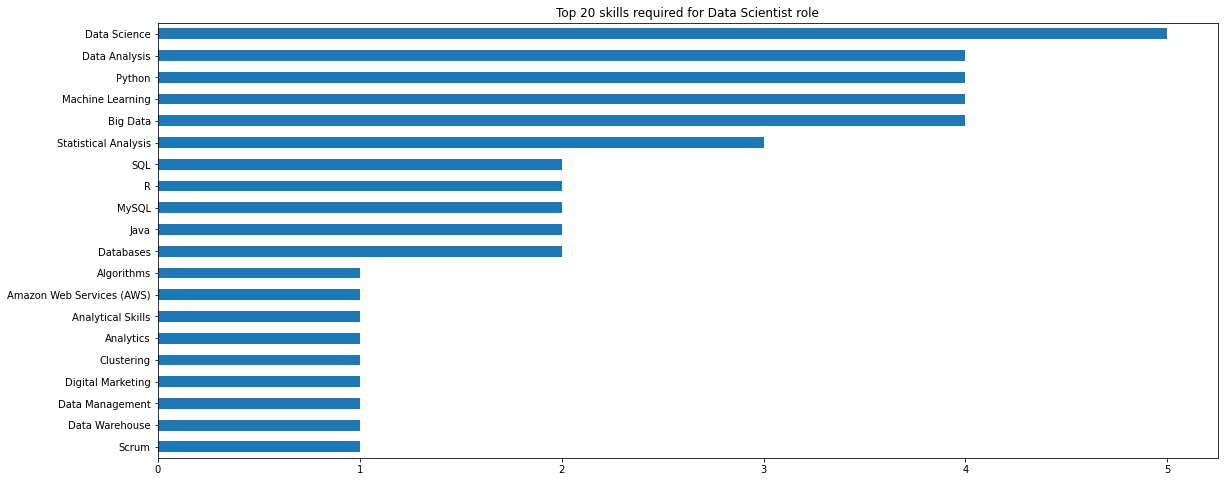

In [210]:
show_top_required_skills(role='Data Scientist')

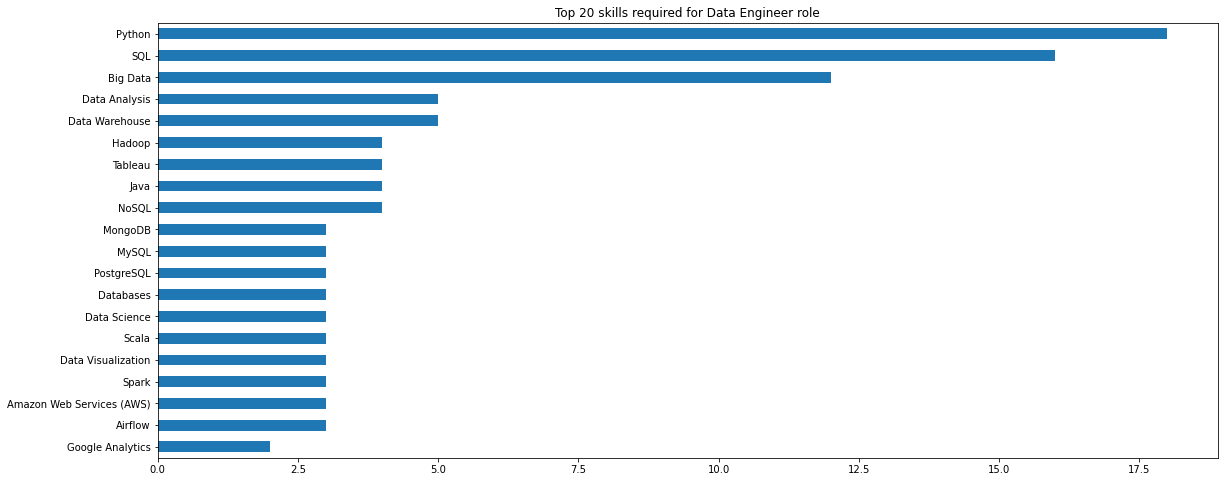

In [211]:
show_top_required_skills(role='Data Engineer')

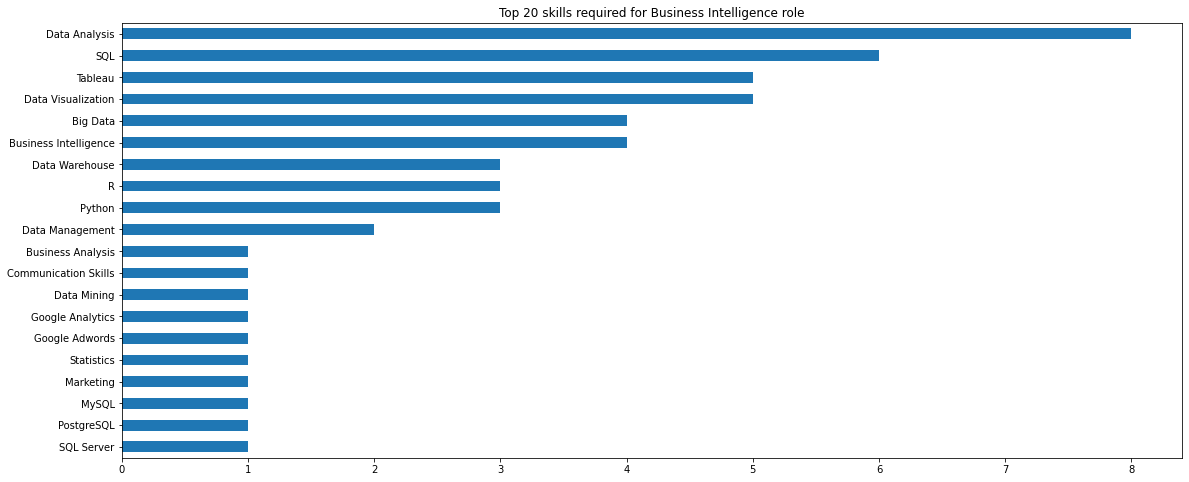

In [212]:
show_top_required_skills(role='Business Intelligence')

In [213]:
df_jobs_da[df_jobs_da['Role'] == 'Data Analyst']

,URL,Title,Company,Industry,Size,Posted at,Location,Job Type,Experience Required,Responsibilities,Requirements,Skills Required,Raw Details,Job Type_old,Role
0,https://www.techinasia.com/jobs/5ae5dd38-934c-...,Data Analyst,Cicil,"Lending, loans, and credit",51 – 200,Date created: 9 Nov 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,['Senior Digital Performance Marketing Special...,['Senior Digital Performance Marketing Special...,"['Python', 'SQL', 'R']","<div class=""jsx-3475296548""><ul><li>Analyze da...",Full-time,Data Analyst
1,https://www.techinasia.com/jobs/4796d0b2-d056-...,Data Analyst,Aruna,Retail (food),51 – 200,Date created: 8 Nov 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,"['Data Intelligence (Senior)SIRCLOTangerang, I...","['Data Intelligence (Senior)SIRCLOTangerang, I...","['Analytics', 'Data Science', 'Data Analysis']","<div class=""jsx-3475296548""><p><strong>Job Des...",Full-time,Data Analyst
2,https://www.techinasia.com/jobs/5fa7c12f-6906-...,Data Analyst (Mid),Bobobox Indonesia,Hotels & Accomodation,51 – 200,Date created: 5 Nov 2021,"Bandung, Java, Indonesia",Full-time,1 to 4 years,['Processing confidential data and information...,['Minimum 2 year work experience as a data ana...,"['Data Analysis', 'Big Data', 'Databases']","<div class=""jsx-3475296548""><p><em>Founded in ...",Full-time,Data Analyst
3,https://www.techinasia.com/jobs/f57cc1f4-0697-...,Data Analyst,Diary Bunda,Health Care,11 – 50,Date created: 3 Nov 2021,"Jakarta, Indonesia",Freelance,1 to 4 years,['Enable effective decision making by retrievi...,['Enable effective decision making by retrievi...,"['MySQL', 'Python', 'Business Analysis', 'Data...","<div class=""jsx-3475296548""><p><strong>Positio...",Freelance,Data Analyst
4,https://www.techinasia.com/jobs/2f12e8ef-60d8-...,Data Analyst (Mid),Bobobox Indonesia,Hotels & Accomodation,51 – 200,Date created: 31 Oct 2021,"Bandung, Java, Indonesia",Full-time,1 to 4 years,['Processing confidential data and information...,['Minimum 2 year work experience as a data ana...,"['Data Analysis', 'Microsoft Excel', 'Python',...","<div class=""jsx-3475296548""><p><strong>Respons...",Full-time,Data Analyst
5,https://www.techinasia.com/jobs/9b9e40a9-40bb-...,Data Analyst,Payfazz (PT. Payfazz Teknologi Nusantara),Payments and remittance,201 – 500,Date created: 22 Oct 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,"['Collecting, compiling and designing informat...","['Minimum has a Bachelor Degree in Statistics,...","['MySQL', 'Statistics', 'Data Science', 'SQL',...","<div class=""jsx-3475296548""><p><strong>Job Des...",Full-time,Data Analyst
6,https://www.techinasia.com/jobs/9d2e76c7-46ee-...,Data Analyst,detik.com,Digital Media,"501 – 1,000",Date created: 22 Oct 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,"['Importing, cleaning, transforming, validatin...",['Educational background is flexible but we do...,"['Data Visualization', 'Python', 'Product Mana...","<div class=""jsx-3475296548""><p><strong>Job Res...",Full-time,Data Analyst
7,https://www.techinasia.com/jobs/b831f2d1-b119-...,Data Analyst,Sampingan,Social Recruiting,51 – 200,Date created: 15 Oct 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,"['Analyze large, complex datasets to extract i...","['Casual dress code,\xa0', 'Flexible hours,\xa...","['Data Science', 'SQL', 'Tableau']","<div class=""jsx-3475296548""><p>Sampingan is an...",Full-time,Data Analyst
8,https://www.techinasia.com/jobs/058d7ff1-14a4-...,Data Analyst,Tunaiku,"Lending, loans, and credit","1,001 – 5,000",Date created: 11 Oct 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,['Perform data visualizations to uncover valua...,"[""Preferably Bachelor's Degree in mathematics,...","['Data Visualization', 'Python', 'SQL', 'R', '...","<div class=""jsx-3475296548""><p><strong>Main Re...",Full-time,Data Analyst
9,https://www.techinasia.com/jobs/80259777-eb19-...,Data Analyst (P2P),"PT Tani Hub Indonesia (TaniHub, TaniFund)",Agriculture Tech,201 – 500,Date created: 8 Oct 2021,"Jakarta

In [220]:
df_jobs_da['Senior/Manager Role'] = df_jobs_da.loc[:, 'Title'].apply(
    lambda x: 1 if re.match('^.*(Sr.|Senior|Lead|Manager|Head).*', x) else 0
)
df_jobs_da['Senior/Manager Role'].value_counts()

/var/folders/0s/2ngs3p4j0dn7m5nk3w1gcrs40000gn/T/ipykernel_12754/59825619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_da['Senior/Manager Role'] = df_jobs_da.loc[:, 'Title'].apply(


0    48
1    18
Name: Senior/Manager Role, dtype: int64

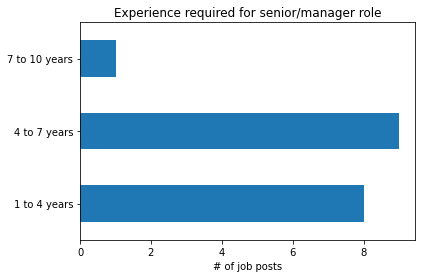

In [227]:
df_jobs_da[df_jobs_da['Senior/Manager Role'] == 1]['Experience Required'].value_counts(
).sort_index().plot(kind='barh')
plt.title('Experience required for senior/manager role')
plt.xlabel('# of job posts')
plt.show()

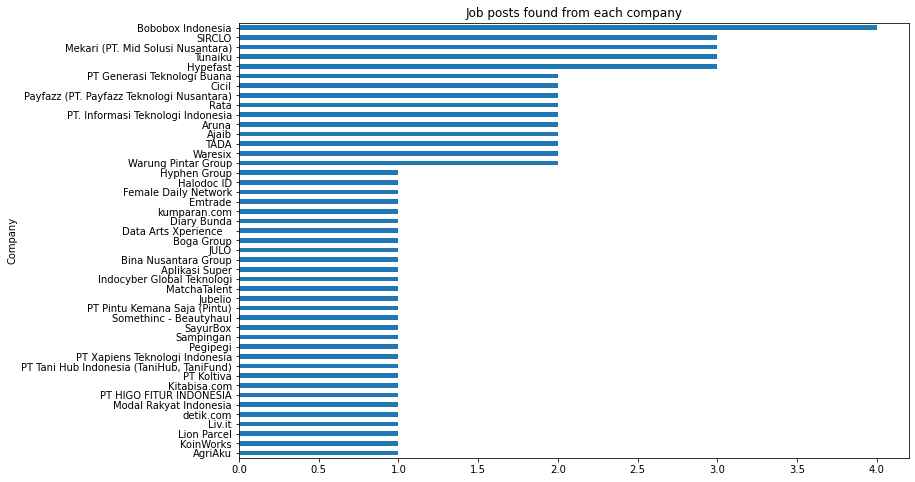

In [237]:
plt.figure(figsize=(12,8))
df_jobs_da.groupby('Company')['Role'].count().sort_values().plot(kind='barh')
plt.title('Job posts found from each company')
plt.show()